In [50]:
# Importing the packages
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.fft as fft
import scipy.signal as signal
from sklearn.pipeline import Pipeline
from pprint import pprint
from datetime import datetime
import scipy

In [2]:
# Available files
stave_supine_static = "../Data/1_Stave_supine_static.txt"
mattress_supine = "../Data/2_Mattress_supine.txt"
subject_sitting_chair = "../Data/3_Subject_sitting_chair.txt"
chest_sweater = "../Data/4_Chest_sweater.txt"
under_chair = "../Data/5_Under_chair.txt"
center_sternum = "../Data/center_sternum.txt"

In [ ]:
filenames = ["../Data/center_sternum.txt","../Data/1_Stave_supine_static.txt","../Data/2_Mattress_supine.txt","../Data/3_Subject_sitting_chair.txt","../Data/4_Chest_sweater.txt","../Data/5_Under_chair.txt"]
chosen_file = 5
cuts = [(1129, 14306), (1750, 7999), (1659, 11078), (875, 6109), (1689, 5687), (834, 8756)]

In [ ]:
def calibrate(data):
	offset_gyro = np.array([-2.242224, 2.963463, -0.718397])
	calibration_acc = np.array([[1.000966,     -0.002326418,-0.0006995499],
								[-0.002326379,  0.9787045,  -0.001540918],
								[-0.0006995811,-0.001540928, 1.00403]])
	offset_acc = np.array([-3.929942, -13.74679, 60.67546])
	calibration_magn = np.array([[0.9192851, -0.02325168, 0.003480837],
								[-0.02325175, 0.914876, 0.004257396],
								[0.003481006, 0.004257583, 0.8748001]])
	offset_magn = np.array([-95.67974, -244.9142, 17.71132])
	if filenames[chosen_file] != "../Data/center_sternum.txt":
		offset_gyro = np.array([-2.804399, 1.793105, 0.3411708])
		calibration_acc = np.array([[1.002982,    9.415505E-05, 0.004346743],
									[9.04459E-05, 1.002731,    -0.001444198],
									[0.004346536,-0.001444751,  1.030587]])
		offset_acc = np.array([3.602701, -20.96658, 54.97186])
		calibration_magn = np.array([[1.013437,    -0.04728858,  -0.001861475],
									[-0.04728862,  1.004832,    0.008222118],
									[-0.001861605, 0.008221965, 0.9439077]])
		offset_magn = np.array([-150.4098, 74.62431, 630.9805])
	# Apply calibration and offset to respective columns
	data[['GyroX', 'GyroY', 'GyroZ']] += offset_gyro
	data[['AccX', 'AccY', 'AccZ']] = np.dot(data[['AccX', 'AccY', 'AccZ']], calibration_acc.T) + offset_acc
	data[['MagnX', 'MagnY', 'MagnZ']] = np.dot(data[['MagnX', 'MagnY', 'MagnZ']], calibration_magn.T) + offset_magn
	return data

In [ ]:
data = calibrate(data)

In [ ]:
# Cutting the start and the end of the dataset
cleaned_data = data[cuts[chosen_file][0]: cuts[chosen_file][1]].reset_index(drop=True)
cleaned_data.tail()

# Loading the file

In [3]:
# Import the file inside "data" Dataframe
data = pd.read_csv(center_sternum, sep='\t').reset_index(drop=True)
data.head()

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
0,5,200,1576222772,947.086,435.662,70.638,-6.824428,-14.244280,1.404580,-454,-490,-178,0.792622,0.254952,-0.553850,-0.000031
1,5,200,1576222772,969.168,387.777,88.877,6.183206,-12.290080,-7.969466,-454,-490,-177,0.736461,0.275124,-0.617969,0.006806
2,5,200,1576222772,989.603,380.335,78.751,11.709920,-4.961832,-7.450382,-454,-490,-177,0.729465,0.275246,-0.626118,0.009827
3,5,200,1576222772,954.894,418.033,88.328,17.877860,2.519084,-5.984733,-454,-492,-176,0.723413,0.277200,-0.632221,0.011383
4,5,200,1576222772,972.096,427.732,99.857,25.221370,5.404580,4.015267,-454,-492,-176,0.721948,0.280007,-0.632679,0.010193


# Showcase of the data

In [4]:
# TODO

# Calibration of the data

In [5]:
# Define Calibration variables from file
offset_gyro = np.array([-2.242224, 2.963463, -0.718397])

calibration_acc = np.array([[ 1.0009660000, -0.002326418, -0.0006995499],
                            [-0.0023263790,  0.978704500, -0.0015409180],
                            [-0.0006995811, -0.001540928,  1.0040300000]])

offset_acc = np.array([-3.929942, -13.746790, 60.675460])

calibration_magn = np.array([[ 0.919285100, -0.023251680, 0.003480837],
                             [-0.023251750,  0.914876000, 0.004257396],
                             [ 0.003481006,  0.004257583, 0.874800100]])

offset_magn = np.array([-95.679740, -244.914200, 17.711320])

# Apply calibration and offset to respective columns
data[['GyroX', 'GyroY', 'GyroZ']] += offset_gyro
data[['AccX', 'AccY', 'AccZ']] = np.dot(data[['AccX', 'AccY', 'AccZ']], calibration_acc.T) + offset_acc
data[['MagnX', 'MagnY', 'MagnZ']] = np.dot(data[['MagnX', 'MagnY', 'MagnZ']], calibration_magn.T) + offset_magn

In [6]:
# Cofronting the nominal frequency given in the coloumn with the one we can get from timestamps
couts = data.groupby(["Log Freq"]).count().value_counts()
frequency = data.loc[0, "Log Freq"]
print("The nominal frequency in the Log column is", frequency)

t_min = datetime.fromtimestamp(data["Timestamp"].min())  
t_max = datetime.fromtimestamp(data["Timestamp"].max())  
acquisition_seconds = (t_max-t_min).total_seconds()      
acq_per_sec = data.groupby("Timestamp").size()
mean_frequency = np.mean(acq_per_sec)  
percentage_difference = np.abs(frequency - mean_frequency) / frequency * 100

print("The starting time for the acquisition is: ", t_min)
print("The ending time for the acquisition is: ", t_max)
print("The total time of acquisition is: ", acquisition_seconds, "s")
print("\nThe total number of acquisitions is: ",data.shape[0])
print("The mean sampling frequency is: ", round(mean_frequency, 3))
print("The difference in percentage from the nominal frequency to the mean frequency from time stamps is", round(percentage_difference, 2),"%")

The nominal frequency in the Log column is 200
The starting time for the acquisition is:  2019-12-13 08:39:32
The ending time for the acquisition is:  2019-12-13 08:40:47
The total time of acquisition is:  75.0 s

The total number of acquisitions is:  16506
The mean sampling frequency is:  217.184
The difference in percentage from the nominal frequency to the mean frequency from time stamps is 8.59 %


In [7]:
# Inserting absolute time column
data.insert(2, "Time", np.arange(0, data.shape[0]) * (1 / mean_frequency), allow_duplicates=False)

# Cleaning of the data

In [8]:
start = 1129
finish = 14306 + 1
data = data[start:finish]

# Dimensionality Reduction

In [9]:
## Pre-processing data: dropping columns and scaling
data_for_pca = data.drop(columns=["Log Freq","Log Mode","Timestamp","Time"])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

In [10]:
## Instantiating PCA and kernelPCA
pca = PCA()

## Computing PCA
pca_transformed_data = pca.fit_transform(scaled_data)

PCA tell us to keep 6 features to retain 90% variance


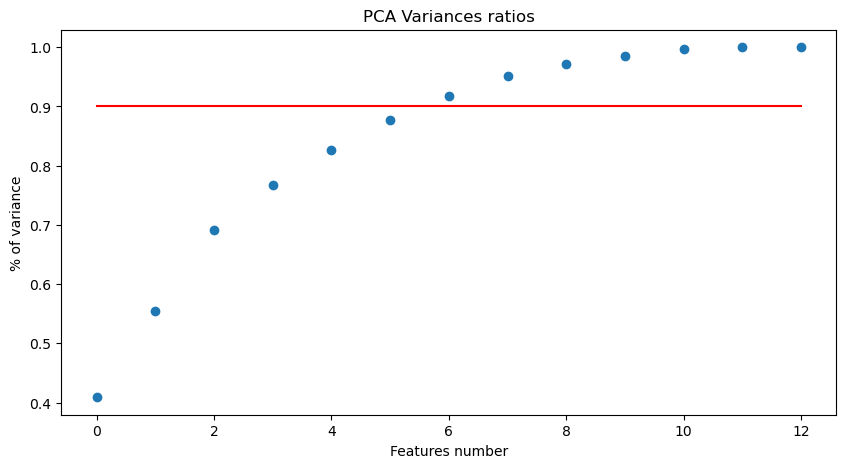

In [11]:
# Analyzing the result of PCA
PCA_Variances_Ratios = np.cumsum(pca.explained_variance_ratio_)

fig, ax1 = plt.subplots(1,1,figsize = (10,5))
ax1.scatter(np.arange(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_))
ax1.set_title("PCA Variances ratios")
ax1.set_ylabel("% of variance")
ax1.set_xlabel("Features number")
ax1.plot(np.arange(len(pca.explained_variance_ratio_)),np.ones(len(pca.explained_variance_ratio_))*0.9,color="red")
most_important_features_number = np.sum(np.cumsum(pca.explained_variance_ratio_) < 0.9)
print(f"PCA tell us to keep {most_important_features_number} features to retain 90% variance")
pca_transformed_data_with_only_important_feature = pca_transformed_data[:,0:most_important_features_number]

# Fast Fourier Transform

In [12]:
# Perform the DFT
N = len(pca_transformed_data_with_only_important_feature)
sig_fft = fft.fftshift(fft.fft(pca_transformed_data_with_only_important_feature, axis=0))
frequencies = fft.fftshift(fft.fftfreq(N, d=1/mean_frequency))

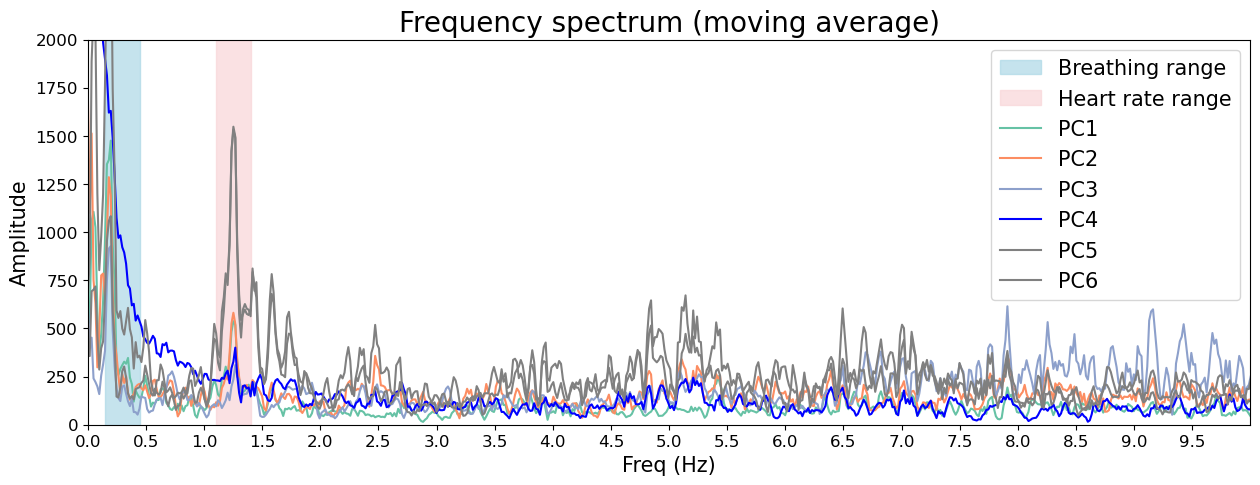

In [13]:
# Find the minima of the spectrum of the fourth principal component
minima, _ = signal.find_peaks(-np.abs(sig_fft[N//2:, 3]))


# Define the moving average (noise reduction)
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


# Plot the spectrum of the principal components
fig, ax = plt.subplots(figsize=(15, 5))

ax.axvspan(0.15, 0.45, color="lightblue", alpha=0.7, label="Breathing range")
ax.axvspan(1.1, 1.4, color="#F8D5D8", alpha=0.7, label="Heart rate range")

pca_indeces = np.arange(most_important_features_number)
palette = ['#66c2a5', '#fc8d62', '#8da0cb', 'blue', 'grey', 'grey']
palette = palette[0:most_important_features_number]
assert len(pca_indeces) == len(palette), "Size error"
for i, color in zip(pca_indeces, palette):
    ax.plot(frequencies[1:-1], moving_average(np.abs(sig_fft[:, i]), 3), color=color, label="PC"+str(i+1))

ax.set_xlim(0, 10)
ax.set_ylim(0, 2000)
ax.xaxis.set_ticks(np.arange(0, 10, 0.5))
ax.tick_params(axis='both', labelsize=12)
ax.set_xlabel("Freq (Hz)", fontsize=15)
ax.set_ylabel("Amplitude", fontsize=15)
ax.set_title("Frequency spectrum (moving average)", fontsize=20)
ax.legend(fontsize=15)
#ax.grid('lightgrey')


Text(0.5, 1.0, 'Heartbeat Frequency spectrum')

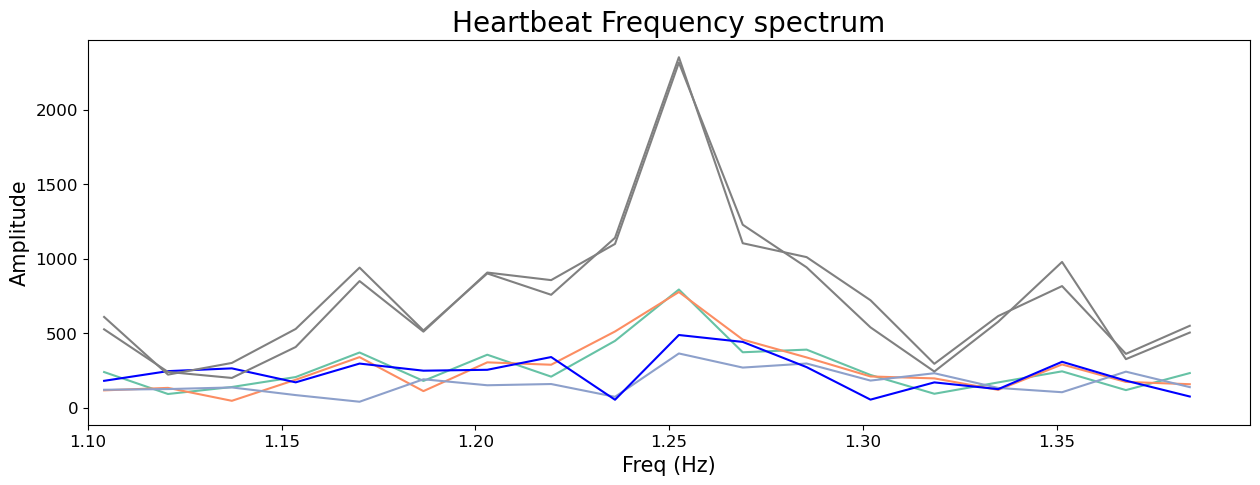

In [14]:
# Plot relevant frequency band
fig, ax = plt.subplots(figsize=(15, 5))

pca_indeces = np.arange(most_important_features_number)
palette = ['#66c2a5', '#fc8d62', '#8da0cb', 'blue', 'grey', 'grey']
palette = palette[0:most_important_features_number]
assert len(pca_indeces) == len(palette), "Size error"
for i, color in zip(pca_indeces, palette):
    ax.plot(frequencies[np.logical_and(frequencies > 1.1, frequencies < 1.4)], np.abs(sig_fft[np.logical_and(frequencies > 1.1, frequencies < 1.4), i]), 3, color=color, label="PC"+str(i+1))

ax.set_xlim(1.1, 1.4)
ax.xaxis.set_ticks(np.arange(1.1, 1.4, 0.05))
ax.tick_params(axis='both', labelsize=12)
ax.set_xlabel("Freq (Hz)", fontsize=15)
ax.set_ylabel("Amplitude", fontsize=15)
ax.set_title("Heartbeat Frequency spectrum", fontsize=20)
#ax.grid('lightgrey')

In [147]:
data

,Log Mode,Log Freq,Time,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
1129,5,200,5.198352,1576222777,-30.353533,84.271922,-903.467026,-5.051384,6.734455,0.609847,-277.117256,-635.227034,397.420161,0.016773,0.475967,-0.877682,-0.053377
1130,5,200,5.202957,1576222777,-28.159666,78.856221,-879.023016,-4.990316,6.154303,0.457176,-277.143989,-634.316416,396.549619,0.016272,0.475906,-0.877743,-0.053072
1131,5,200,5.207561,1576222777,-18.350084,75.981297,-926.674494,-4.944514,6.123768,0.380840,-277.124218,-635.235549,395.670561,0.017327,0.475814,-0.877834,-0.052034
1132,5,200,5.212165,1576222777,-18.730826,77.270755,-910.507407,-5.433064,5.955829,-0.184046,-277.124218,-635.235549,395.670561,0.016911,0.475753,-0.877895,-0.051698
1133,5,200,5.216770,1576222777,-26.192294,79.061426,-898.990805,-5.601003,5.635219,-0.229847,-277.113775,-635.222777,398.294962,0.017588,0.475692,-0.877926,-0.051515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14302,5,200,65.851933,1576222837,-37.419900,100.033601,-893.258880,-5.234590,6.368043,-2.077176,-277.221820,-632.524980,388.684933,0.027129,0.588885,-0.805475,-0.060732
14303,5,200,65.856537,1576222837,-43.790755,104.743776,-879.604047,-4.944514,6.627585,-2.031374,-276.302534,-632.548232,388.688414,0.027724,0.588916,-0.805414,-0.060976
14304,5,200,65.861141,1576222837,-42.203581,104.259188,-877.460801,-4.990316,6.932929,-2.199313,-276.302534,-632.548232,388.688414,0.027626,0.588946,-0.805383,-0.061129
14305,5,200,65.865746,1576222837,-30.279899,105.949765,-907.849686,-4.669705,7.238272,-2.443588,-277.228781,-632.533495,386.935333,0.027930,0.588977,-0.805353,-0.061098


Estimated BPM:  78.1190740548442


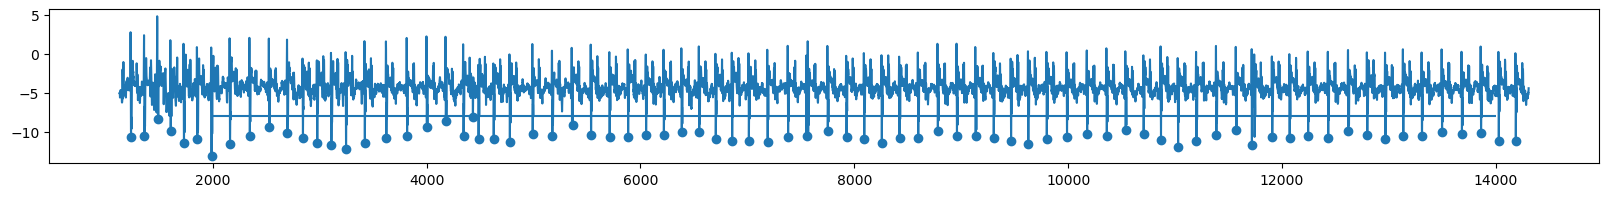

In [235]:
fig, ax = plt.subplots(figsize=(20,2))
thr = -8
off = data.index[0]
ax.plot(data.GyroX)
ax.hlines(thr,2000,14000)
np.sum(data.GyroX < thr) / 75 * 60
peak_index, _ = signal.find_peaks(-data.GyroX,-thr,distance=50)
ax.scatter(peak_index + off, data.GyroX[peak_index + off])
print("Estimated BPM: ", peak_index.shape[0]/(data.GyroX.shape[0]/mean_frequency)*60)

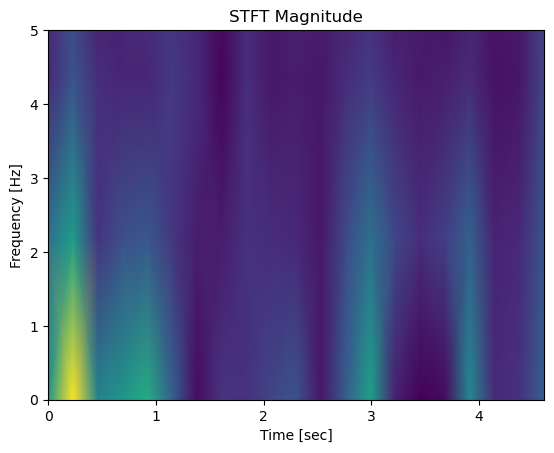

In [192]:
f, t, Zxx = signal.stft(pca_transformed_data_with_only_important_feature[1000:2000,1], mean_frequency, nperseg=100,window="hamming")

plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')

plt.title('STFT Magnitude')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
plt.ylim(0,5)
plt.show()